**Modelos no supervizados**


El set de datos datos clustering.csv contiene 1000 observaciones simuladas, en la que se poseen 10 atributos numéricos llamadas V1 a V10, además, del atributo y que indica el grupo real de la observación.

*Pregunta 1*

Realice un análisis de componentes principales seleccione la cantidad de componentes que expliquen al menos el 70% de la variabilidad de los datos.

In [1]:
####EXPLORACIón y LIMPIEZA de DATOS

# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#%pip install plotly.express


In [2]:
# Cargamos los datos
datos = pd.read_csv("datos clustering.csv")

# Mostramos sus dimensiones
print(f"\nLa base tiene {datos.shape[0]} filas y {datos.shape[1]} columnas.")
datos.head(10)


La base tiene 1000 filas y 12 columnas.


Unnamed: 0         V1        V2        V3         V4         V5        V6  \
0           0  -4.554889  4.100700 -3.134432  -1.313845  -9.391112  2.519540   
1           1  10.766431  4.114985 -0.145851   6.064239  -4.482858  2.045298   
2           2   8.697494  6.927252  0.081115   8.782801  -6.016109  2.765242   
3           3   7.887380  0.888983  0.613888   6.976301 -11.153522 -5.858364   
4           4   3.432427  3.062779  0.881139  -0.040477  -4.844429  2.057529   
5           5   5.675429  1.059706  5.183239  11.026261  -9.358368 -7.582470   
6           6   0.702005  5.612731 -1.264887   1.421461  -9.784380  2.576619   
7           7  -2.165567 -1.147663  5.634057 -11.174625   2.995522  4.393762   
8           8  -1.915321  1.832291  5.415297   2.261107  -1.545006  5.146295   
9           9   2.518565  3.131941  0.193630   2.124534  -2.973041  1.676693   

          V7        V8         V9       V10  y  
0   1.308041  0.926173   7.067234  3.509057  3  
1  -8.068677  7.231181  -1.361735 -1.031854  2  
2  -9.023664  9.352678  -1.699800 -0.519918  2  
3 -12.793676  4.969787   1.399372  6.831188  1  
4  -2.111636  8.952105  10.530478 -2.324382  0  
5  -8.705630  8.022901   5.690951  6.511886  1  
6   2.358073  1.925590   6.987163  3.941575  3  
7  -3.642045 -7.213488  -3.719636 -2.578511  4  
8  -3.121334  7.267374  10.395472 -0.727961  0  
9  -2.068214  7.866923   8.636066 -4.806082  0

In [3]:
#Eliminar Unnamed
datos = datos.drop('Unnamed: 0', axis=1)
#Eliminamos variable de respuesta
DF= datos.drop('y', axis=1)

In [4]:
# Separamos los predictores de la variable respuesta
X = datos.drop('y', axis=1)

y = datos.iloc[:, -1]
datos.head(10)

V1        V2        V3         V4         V5        V6         V7  \
0  -4.554889  4.100700 -3.134432  -1.313845  -9.391112  2.519540   1.308041   
1  10.766431  4.114985 -0.145851   6.064239  -4.482858  2.045298  -8.068677   
2   8.697494  6.927252  0.081115   8.782801  -6.016109  2.765242  -9.023664   
3   7.887380  0.888983  0.613888   6.976301 -11.153522 -5.858364 -12.793676   
4   3.432427  3.062779  0.881139  -0.040477  -4.844429  2.057529  -2.111636   
5   5.675429  1.059706  5.183239  11.026261  -9.358368 -7.582470  -8.705630   
6   0.702005  5.612731 -1.264887   1.421461  -9.784380  2.576619   2.358073   
7  -2.165567 -1.147663  5.634057 -11.174625   2.995522  4.393762  -3.642045   
8  -1.915321  1.832291  5.415297   2.261107  -1.545006  5.146295  -3.121334   
9   2.518565  3.131941  0.193630   2.124534  -2.973041  1.676693  -2.068214   

         V8         V9       V10  y  
0  0.926173   7.067234  3.509057  3  
1  7.231181  -1.361735 -1.031854  2  
2  9.352678  -1.699800 -0.519918  2  
3  4.969787   1.399372  6.831188  1  
4  8.952105  10.530478 -2.324382  0  
5  8.022901   5.690951  6.511886  1  
6  1.925590   6.987163  3.941575  3  
7 -7.213488  -3.719636 -2.578511  4  
8  7.267374  10.395472 -0.727961  0  
9  7.866923   8.636066 -4.806082  0

In [5]:
X.head()

V1        V2        V3        V4         V5        V6         V7  \
0  -4.554889  4.100700 -3.134432 -1.313845  -9.391112  2.519540   1.308041   
1  10.766431  4.114985 -0.145851  6.064239  -4.482858  2.045298  -8.068677   
2   8.697494  6.927252  0.081115  8.782801  -6.016109  2.765242  -9.023664   
3   7.887380  0.888983  0.613888  6.976301 -11.153522 -5.858364 -12.793676   
4   3.432427  3.062779  0.881139 -0.040477  -4.844429  2.057529  -2.111636   

         V8         V9       V10  
0  0.926173   7.067234  3.509057  
1  7.231181  -1.361735 -1.031854  
2  9.352678  -1.699800 -0.519918  
3  4.969787   1.399372  6.831188  
4  8.952105  10.530478 -2.324382

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1000 non-null   float64
 1   V2      1000 non-null   float64
 2   V3      1000 non-null   float64
 3   V4      1000 non-null   float64
 4   V5      1000 non-null   float64
 5   V6      1000 non-null   float64
 6   V7      1000 non-null   float64
 7   V8      1000 non-null   float64
 8   V9      1000 non-null   float64
 9   V10     1000 non-null   float64
 10  y       1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [7]:
# Veamos los tipos de las columnas
datos.describe()

V1           V2           V3           V4           V5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.710243     2.923479     1.071101     1.438992    -4.830020   
std       5.613573     3.332145     2.553934     6.078318     5.152609   
min     -10.336050    -6.163549    -5.578369   -13.910283   -14.587279   
25%      -3.241236     0.156534    -0.703247    -0.800848    -8.961043   
50%       1.142130     3.350592     1.037109     2.136730    -6.794439   
75%       6.649163     5.577882     2.749196     6.121880    -0.568679   
max      14.373547    11.248621     8.545396    12.254451     8.068756   

                V6           V7           V8           V9          V10  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.562688    -4.337602     3.768002     4.059712     0.885110   
std       4.775007     4.629891     6.244621     5.271564     4.446010   
min     -12.406714   -13.670221   -12.363672    -8.231120    -8.157966   
25%      -0.147294    -8.031575     1.336208    -0.522490    -2.666102   
50%       2.192924    -5.275733     6.128501     5.237320    -0.471722   
75%       3.685808    -0.388468     8.344065     8.462400     4.700983   
max       7.758332     7.563432    14.257335    14.656287    11.998252   

                 y  
count  1000.000000  
mean      2.000000  
std       1.414921  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       4.000000

In [8]:
# Busqueda valores faltantes
datos.isna().sum().sort_values(ascending = False)

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
y      0
dtype: int64

**Variable Respuesta**

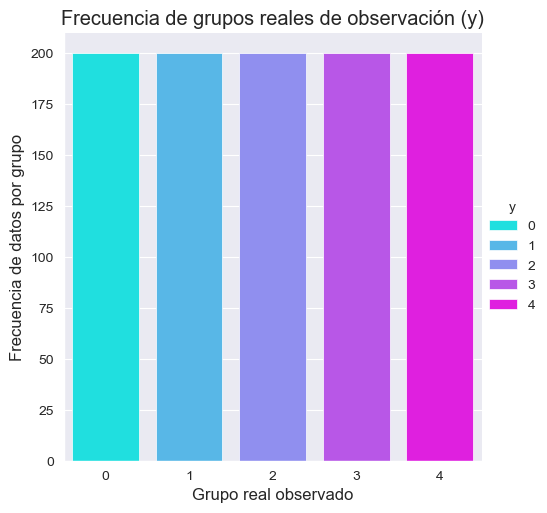

In [9]:

# Cambiar el tema del gráfico
sns.set_style("darkgrid")

sns.catplot(datos, x = 'y', hue= 'y', kind = "count", palette = "cool")


plt.ylabel('Frecuencia de datos por grupo')
plt.xlabel('Grupo real observado')
plt.title('Frecuencia de grupos reales de observación (y)')
plt.show();

In [10]:
y.value_counts()

3    200
2    200
1    200
0    200
4    200
Name: y, dtype: int64

In [11]:
# Niveles variable respuesta
print(f"\nLa variable respuesta tiene los siguientes 5 niveles: {list(np.unique(y))}")


La variable respuesta tiene los siguientes 5 niveles: [0, 1, 2, 3, 4]


In [12]:
#  la variable de respuesta está balanceada, puesto que su frecuencia es exactamente la misma

display(y.value_counts())

3    200
2    200
1    200
0    200
4    200
Name: y, dtype: int64

No es necesario estratificar pero si escalar los datos a fin de usar pca

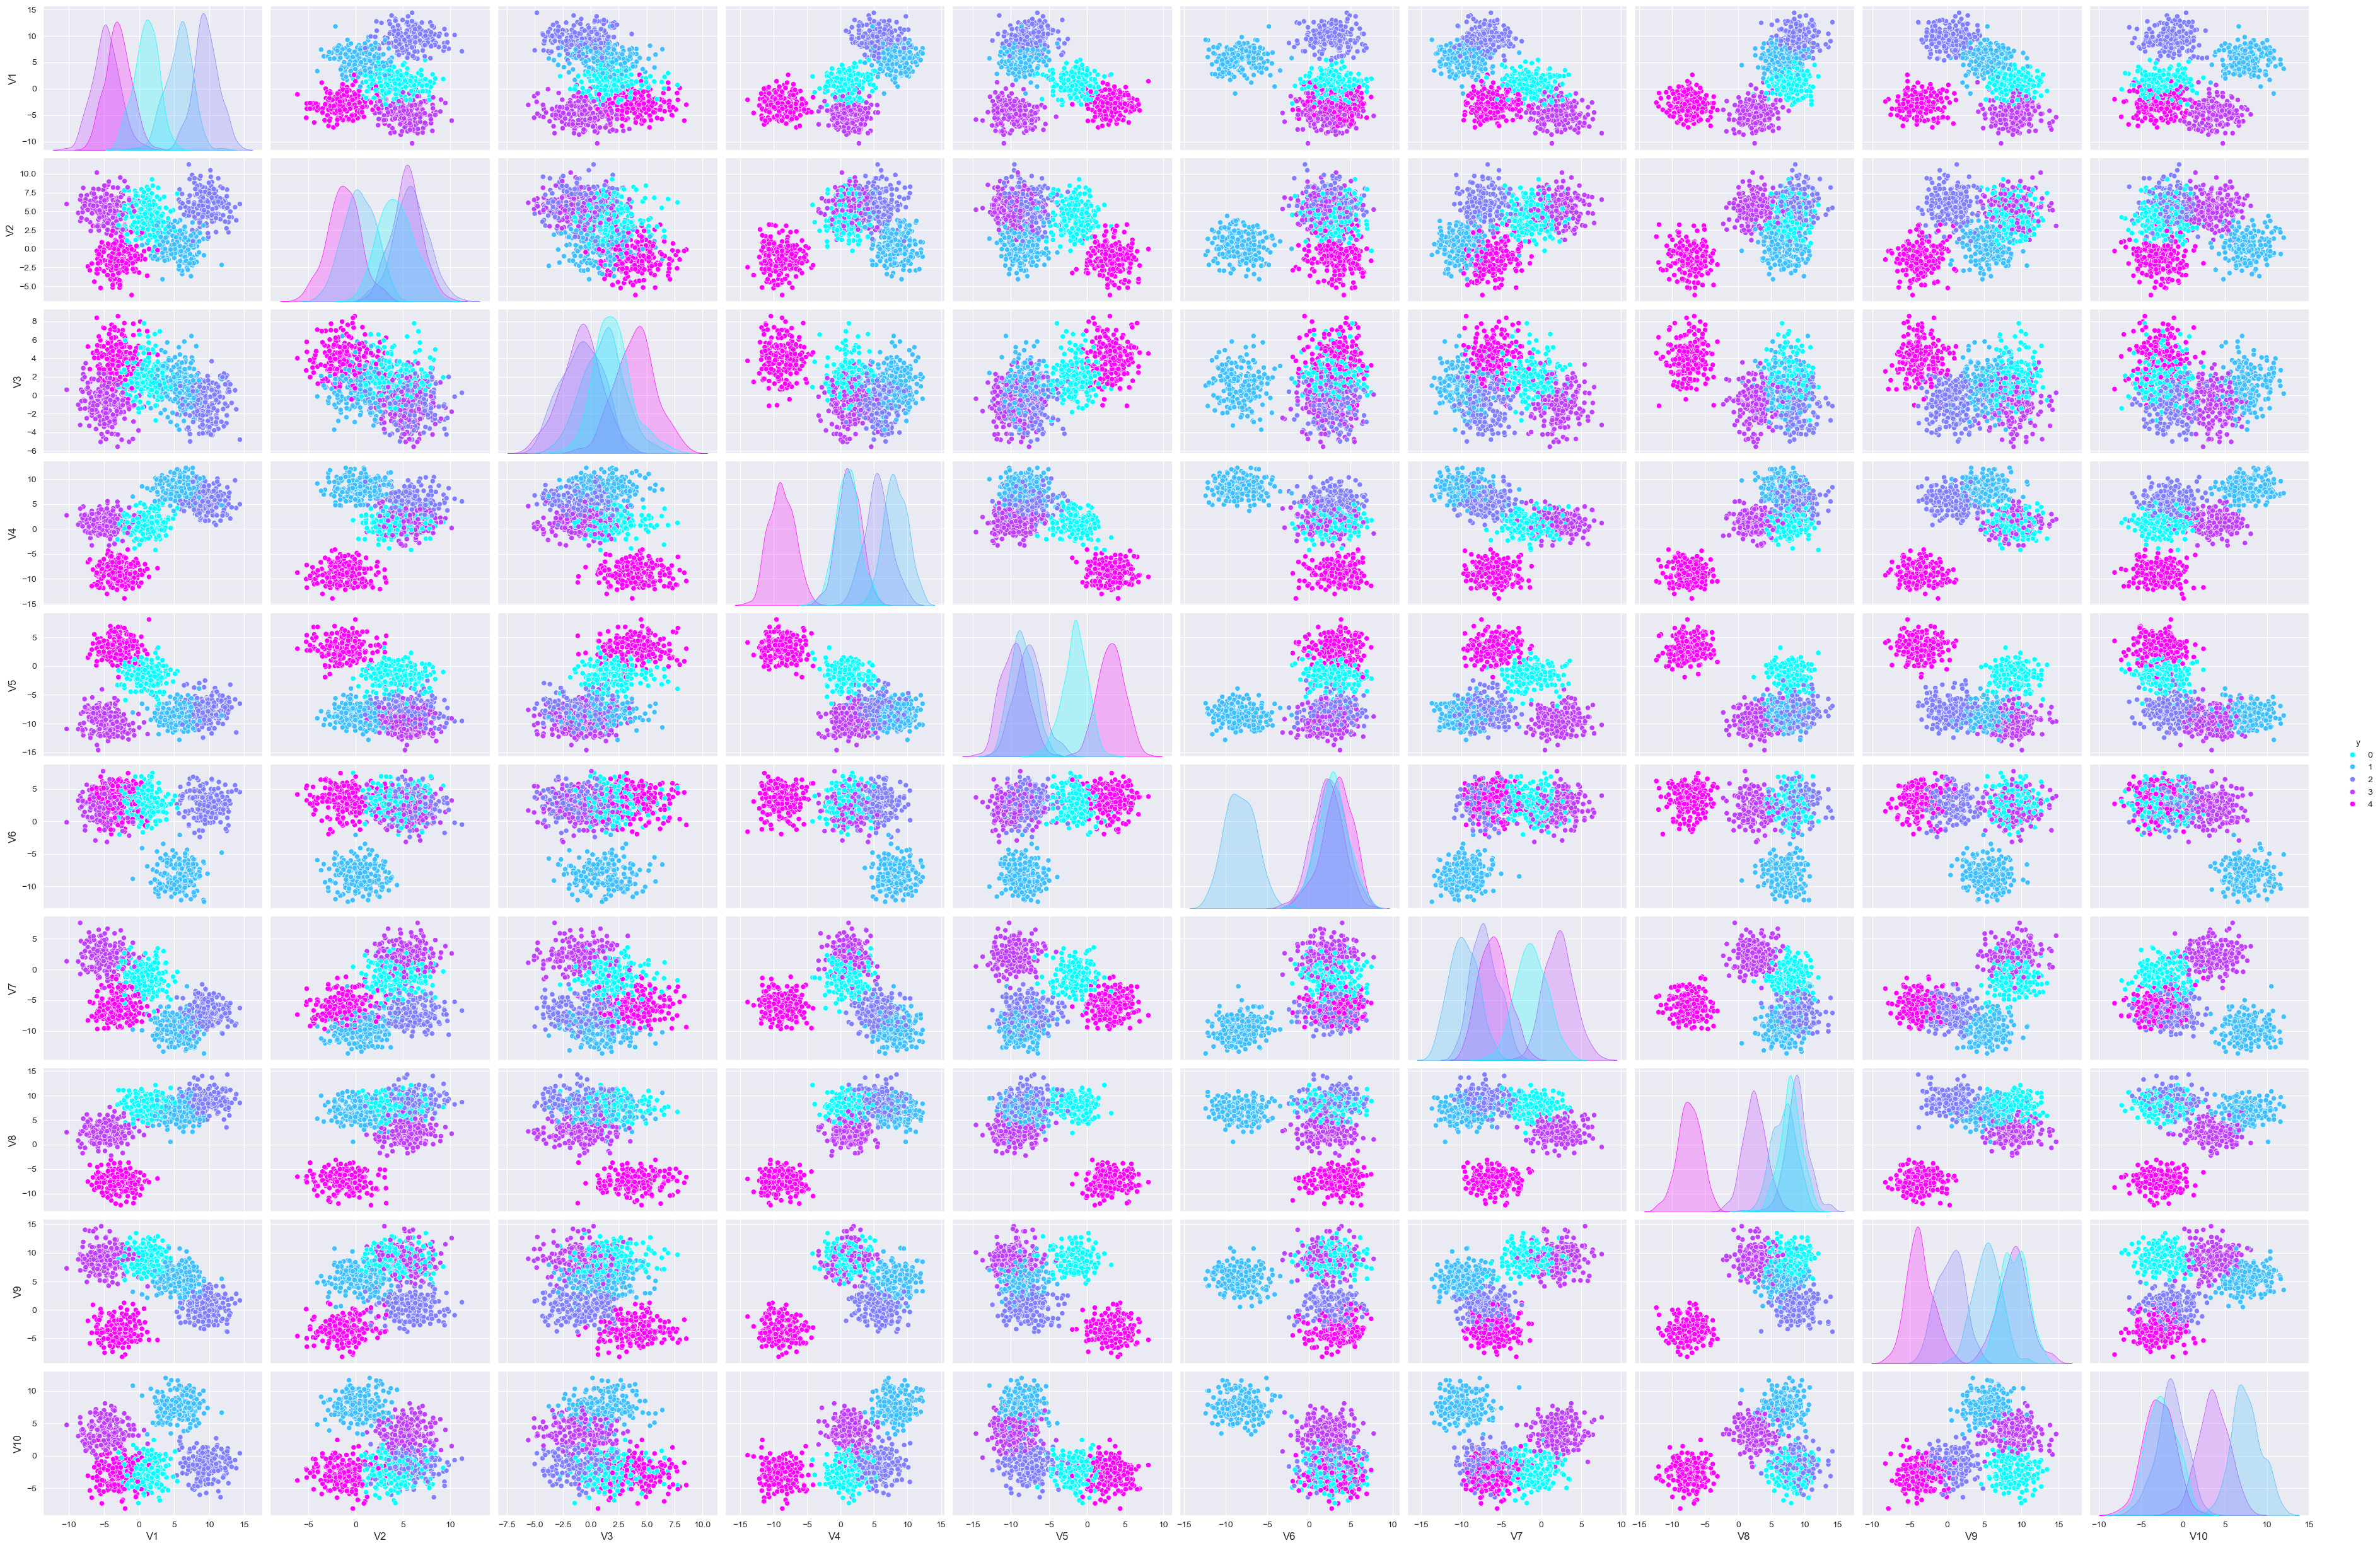

In [13]:
#graficar variable y 

sns.pairplot(datos, hue='y', aspect=1.5, palette= 'cool')
plt.show()

**Variable Respuesta**

In [19]:
pipeline_pca = make_pipeline(StandardScaler(),
                             PCA(random_state = 2023))


pipeline_pca.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(random_state=2023))])

In [20]:
# Obtenemos el pca
modelo_pca = pipeline_pca['pca']

In [21]:
# Obtenemos los eigenvectors (vectores propios)
B = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X.columns,
    index   = [f"PC{num + 1}" for num in range(X.shape[1])]
)

# Mostramos la matriz
display(B)


V1        V2        V3        V4        V5        V6        V7  \
PC1  -0.271634 -0.234441  0.304200 -0.453565  0.420960  0.256768  0.049065   
PC2  -0.297974  0.431729 -0.218227 -0.102835 -0.078975  0.412836  0.583083   
PC3   0.509541  0.292414 -0.121795  0.060623  0.116899  0.351483 -0.224056   
PC4   0.091055  0.004711  0.671898  0.113850  0.307110 -0.110252  0.058707   
PC5   0.021060 -0.559756 -0.587233 -0.015961  0.368429 -0.057968  0.007666   
PC6   0.137702 -0.580611  0.211868  0.170102 -0.421588  0.573184  0.190287   
PC7  -0.103143 -0.144165  0.057694  0.074865 -0.440359 -0.493303  0.281483   
PC8   0.383307 -0.030100 -0.010896  0.041472  0.341558 -0.199552  0.696311   
PC9  -0.588097  0.004751 -0.015928  0.606251  0.257982  0.078406 -0.036225   
PC10 -0.216048 -0.031185 -0.011283 -0.602506 -0.134032 -0.082003 -0.047932   

            V8        V9       V10  
PC1  -0.406024 -0.268939 -0.300442  
PC2   0.065568  0.334481 -0.183823  
PC3   0.255354 -0.336025 -0.520410  
PC4   0.398182  0.471192 -0.191805  
PC5   0.190442  0.330337 -0.237871  
PC6   0.130572 -0.053404  0.087868  
PC7  -0.031078 -0.177110 -0.640947  
PC8   0.058487 -0.363336  0.271230  
PC9   0.263694 -0.377857  0.001075  
PC10  0.692713 -0.250456  0.140158

In [22]:
print(modelo_pca.explained_variance_ratio_*100)

[42.98333089 24.32874161 15.27927591  7.35139986  3.55701878  1.93254272
  1.35755666  1.34412695  1.0132872   0.85271942]


In [23]:

(modelo_pca.explained_variance_ratio_).round(3)

array([0.43 , 0.243, 0.153, 0.074, 0.036, 0.019, 0.014, 0.013, 0.01 ,
       0.009])

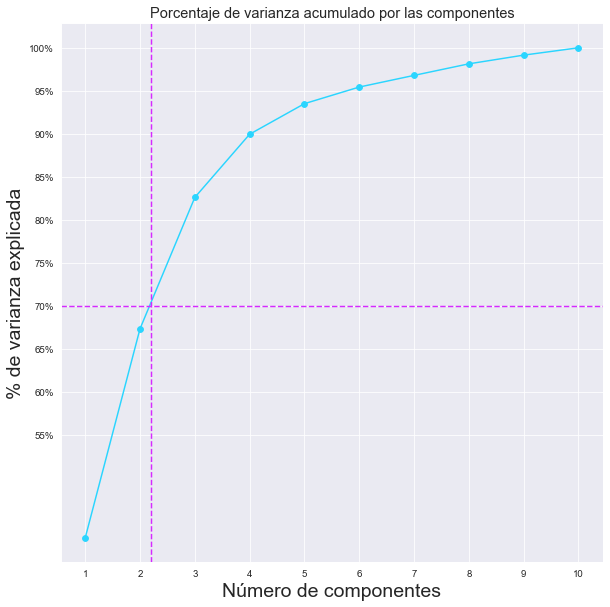

In [24]:

#extra estetico 
colores_seaborn = sns.color_palette("cool", n_colors=5)
# Graficamos


plt.figure(figsize=(10, 10), dpi=70)
plt.plot(
    range(1, len(modelo_pca.components_) + 1),
    np.cumsum(modelo_pca.explained_variance_ratio_),
    marker = "o",
    color=colores_seaborn[0]
)
plt.title(
    "Porcentaje de varianza acumulado por las componentes", 
    size = 15
)
plt.axhline(
    y = .70,
    linestyle = "--",
    color=colores_seaborn[4]
)
plt.axvline(
    x = 2.2,
    linestyle = "--",
    color=colores_seaborn[4]
)
plt.xticks(
    ticks = np.arange(X.shape[1]) + 1,
)
plt.yticks(
    ticks  = np.linspace(0.55, 1, 10),
    labels = [f"{val:0.0%}" for val in np.linspace(0.55, 1, 10)]
)
plt.ylabel(
    "% de varianza explicada", size = 20
)
plt.xlabel(
    "Número de componentes", size = 20
);

3 componentes se explican el 70% de la varianza

**Pregunta 2**

Detecte el número optimo de clustering utilizando la información de PCA con la metodología de Elbow y Average silhouette.

**ELBOW**

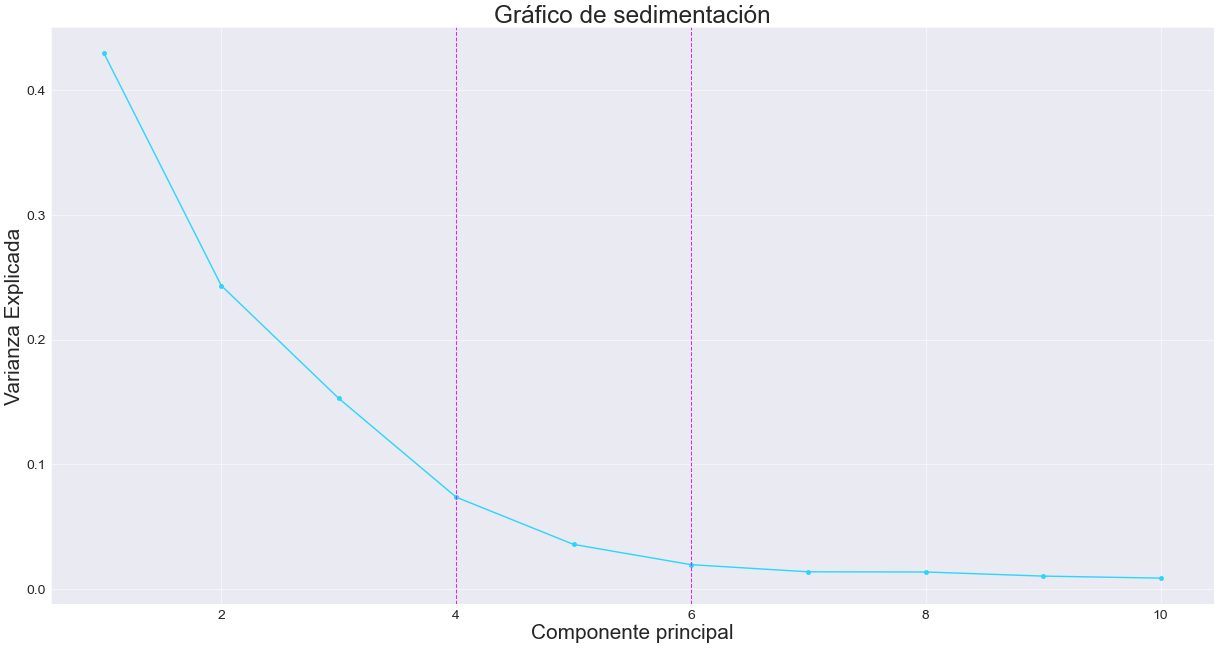

In [30]:
plt.figure(figsize=(30, 15), dpi=50)
PC_values = np.arange(modelo_pca.n_components_) + 1
plt.plot(PC_values, modelo_pca.explained_variance_ratio_, 'o-', linewidth=2, color=colores_seaborn[0])
plt.axvline(x = 4, color=colores_seaborn[4], linestyle = "--")
plt.axvline(x = 6, color=colores_seaborn[4], linestyle = "--")
plt.title("Gráfico de sedimentación", fontsize=35)
plt.xlabel("Componente principal", fontsize=30)
plt.ylabel("Varianza Explicada", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Según el gráfico de codo, tomar entre 4 y 6 componentes sería una buena idea para este problema.

**CLUSTERING: usando la info del PCA**

CON 5 COMPONENTES

**ELBOW + SILHOUETTE**

c:\Users\tamar\miniconda3\envs\entorno1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tamar\miniconda3\envs\entorno1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tamar\miniconda3\envs\entorno1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tamar\miniconda3\envs\entorno1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

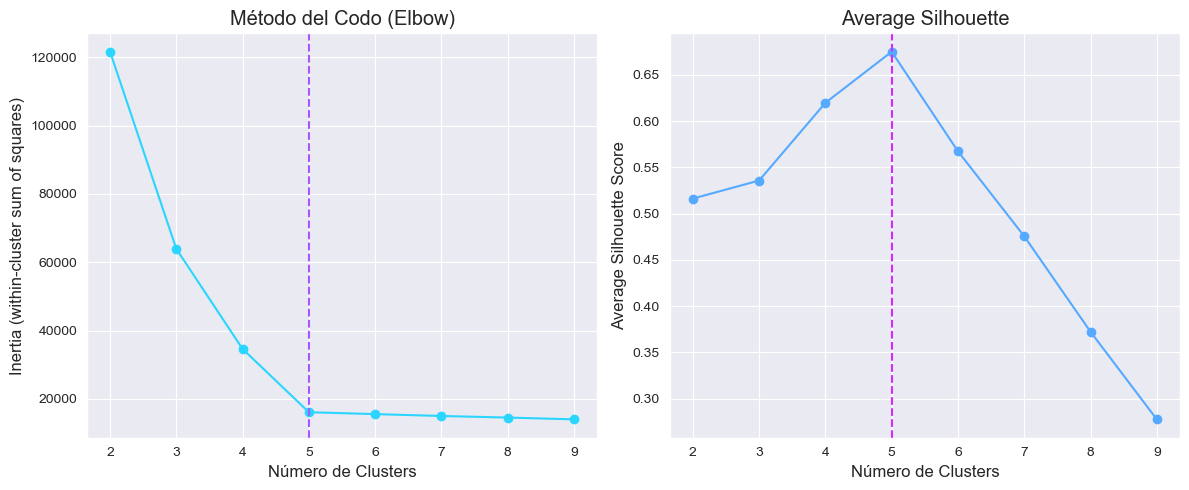

In [51]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


# Realiza PCA para reducir la dimensionalidad
n_components = 5
pca = PCA(n_components=n_components, random_state=2023)
X_pca = pca.fit_transform(X)

# Rango de número de clusters a probar
cluster_range = range(2, 10)

# Método del codo (Elbow)
inertia_values = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=2023)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Average Silhouette
silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=2023)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Grafica los resultados del método del codo (Elbow) y Average Silhouette
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o', color=colores_seaborn[0])
plt.axvline(x=5, linestyle="--", color=colores_seaborn[3])
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Método del Codo (Elbow)')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color=colores_seaborn[1])
plt.axvline(x=5, linestyle="--", color=colores_seaborn[4])
plt.xlabel('Número de Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette')

plt.tight_layout()
plt.show()


Si combinamos el número optimo medio de componentes (5) y la observación de ambos gráficos podemos ver que 5 grupos son adecuados

**Pregunta 3**

Ajuste un clustering de K-means, utilizando las 2 principales componentes principales gráfique los grupos ajustados, qué puede concluir al respecto?

USANDO LOS DATOS QUE YA TENEMOS Y EL MODELO PCA CON SOLO 2 COMPONENTES

In [56]:

# Número de clusters deseado
n_clusters = 5  # Ajusta el número de clusters según tus necesidades

# Aplicar K-Means en los dos primeros componentes principales
X_pca_2d = X_pca[:, :2]  # Tomamos solo los dos primeros componentes principales
kmeans = KMeans(n_clusters=n_clusters, random_state=2023)
cluster_labels = kmeans.fit_predict(X_pca_2d)

c:\Users\tamar\miniconda3\envs\entorno1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


nº Cluster:1
nº Cluster:2
nº Cluster:3
nº Cluster:4
nº Cluster:5


Text(0, 0.5, 'Intra-cluster (inertia)')

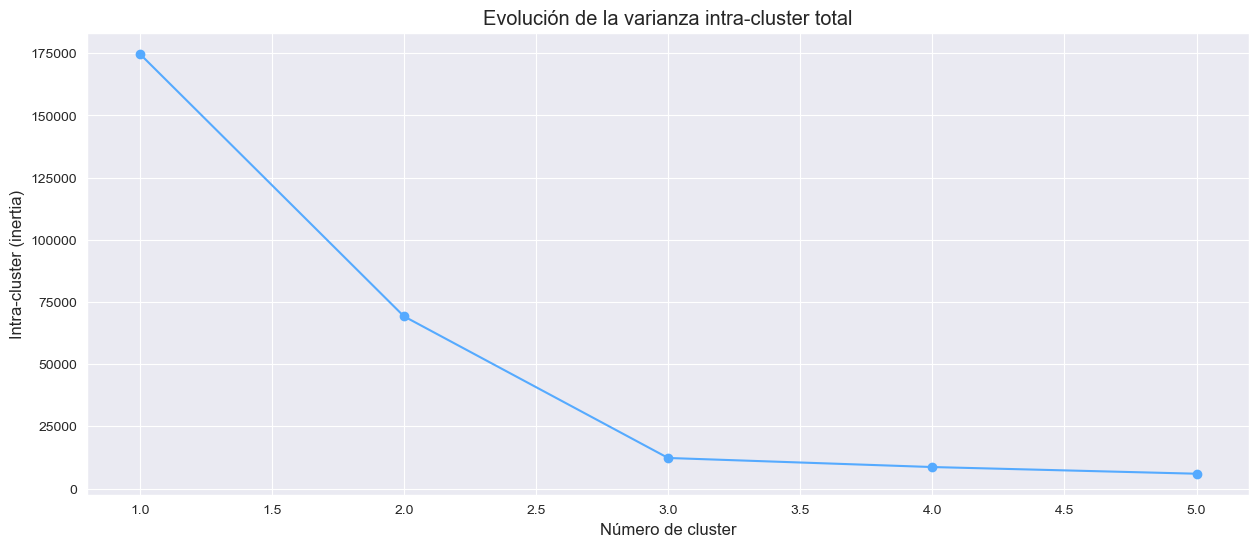

In [60]:
range_n_cluster = range(1, 6)
inertias = []

for n_clusters in range_n_cluster:
    modelo_kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=2023)
    cluster_labels = modelo_kmeans.fit_predict(X_pca[:, :2])  # UtilizaMOS los dos componentes principales
    inertias.append(modelo_kmeans.inertia_)
    print('nº Cluster:{}'.format(n_clusters))

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(range_n_cluster, inertias, marker='o', color=colores_seaborn[1])
ax.set_title('Evolución de la varianza intra-cluster total')
ax.set_xlabel('Número de cluster')
ax.set_ylabel('Intra-cluster (inertia)')






nº Cluster:2
nº Cluster:3
nº Cluster:4
nº Cluster:5
nº Cluster:6
nº Cluster:7
nº Cluster:8
nº Cluster:9
nº Cluster:10
nº Cluster:11
nº Cluster:12
nº Cluster:13
nº Cluster:14


Text(0, 0.5, 'Media indices silhouette')

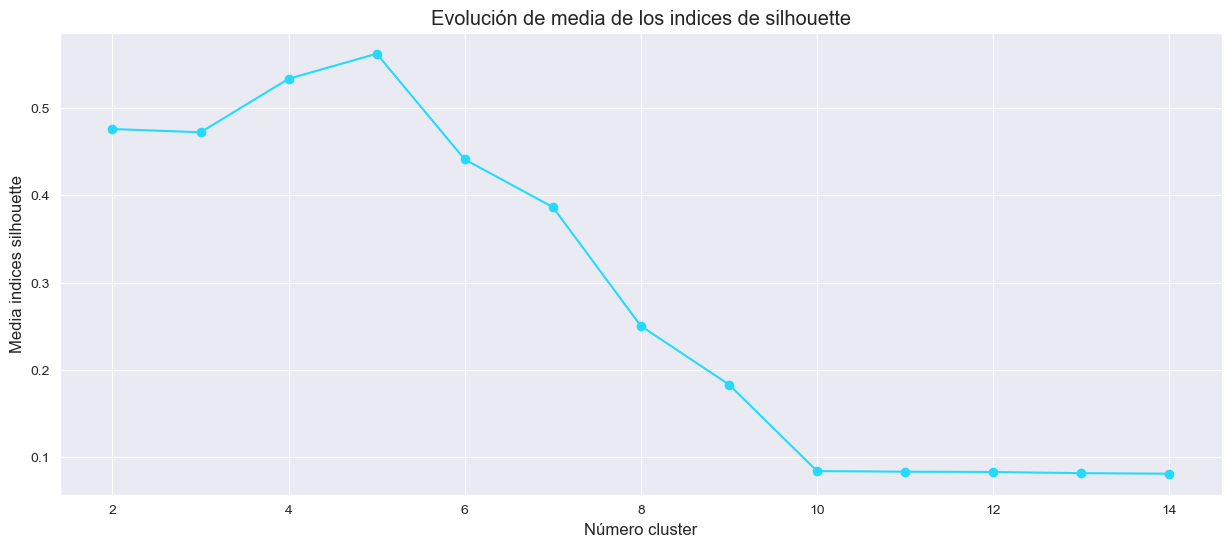

In [59]:
modelo_kmeans = KMeans(n_clusters = 5,
                          n_init = 20,
                          random_state = 2023)

modelo_kmeans.fit(X)

KMeans(n_clusters=5, n_init=20, random_state=2023)

In [65]:
cluster_labels = modelo_kmeans.predict(X_pca[:, :2]).astype('str')

# Usa datos.assign para agregar la columna 'segmento_kmeans' a tus datos
datos_consolidados = DF.assign(segmento_kmeans=cluster_labels)

In [66]:
datos_consolidados

V1        V2        V3        V4         V5        V6         V7  \
0    -4.554889  4.100700 -3.134432 -1.313845  -9.391112  2.519540   1.308041   
1    10.766431  4.114985 -0.145851  6.064239  -4.482858  2.045298  -8.068677   
2     8.697494  6.927252  0.081115  8.782801  -6.016109  2.765242  -9.023664   
3     7.887380  0.888983  0.613888  6.976301 -11.153522 -5.858364 -12.793676   
4     3.432427  3.062779  0.881139 -0.040477  -4.844429  2.057529  -2.111636   
..         ...       ...       ...       ...        ...       ...        ...   
995  -5.638204  5.114135 -2.291695  0.251086 -10.924352  1.057903  -1.287649   
996  -3.508695  0.723544  7.349984 -9.965556   5.947235  3.773877  -5.598804   
997   7.674610  1.017102  0.417147  9.468713  -8.446090  3.635614  -7.830873   
998  -2.715874 -4.812502  1.952096 -9.379788   2.704248  2.744819  -9.215514   
999   7.193590 -1.935865 -0.006201  8.060571  -8.748591 -7.541797 -11.436771   

           V8         V9       V10 segmento_kmeans  
0    0.926173   7.067234  3.509057               1  
1    7.231181  -1.361735 -1.031854               0  
2    9.352678  -1.699800 -0.519918               0  
3    4.969787   1.399372  6.831188               3  
4    8.952105  10.530478 -2.324382               4  
..        ...        ...       ...             ...  
995  0.283605  10.307540  3.024076               1  
996 -6.681666  -3.295204 -4.446303               2  
997  7.801254   3.202772 -1.398679               0  
998 -3.714886  -3.388018 -2.648786               2  
999  4.581151   6.644224  7.376392               3  

[1000 rows x 11 columns]

In [67]:
datos_consolidados['segmento_kmeans'].value_counts()

0    212
1    202
2    200
4    198
3    188
Name: segmento_kmeans, dtype: int64

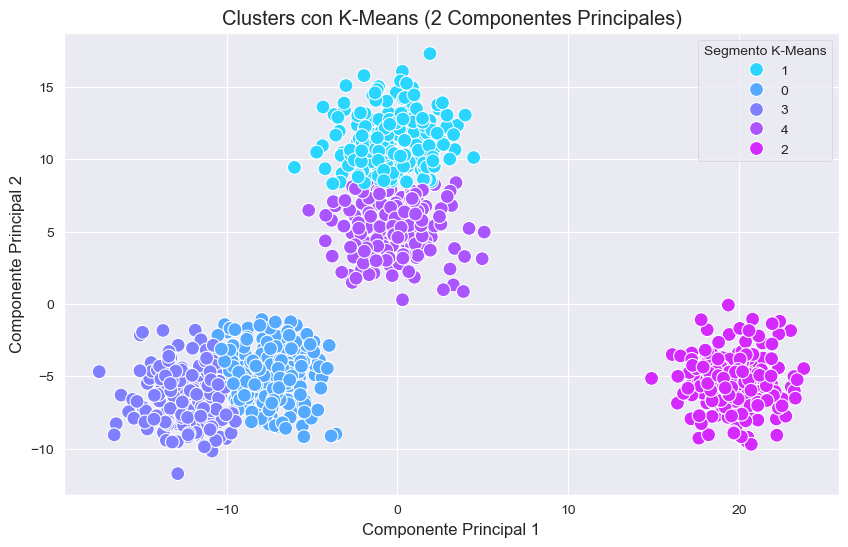

In [111]:
# Gráfico de dispersión de los clusters
plt.figure(figsize=(10, 6))



sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='cool', s=100)
plt.title('Clusters con K-Means (2 Componentes Principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Segmento K-Means', loc='upper right')
plt.show()

Considerando que habiamos ya comprobado que 2 componentes principales no alcanzaban a explicar el 70% de la varianza, podriamos concluir que este modelo no es bueno si solo utilizamos 2 componentes, si usaramos 3 o 4 podriamos explicar mucho más.

Aunque los datos consolidados son cercanos a los de la variable de respuesta (200) hay algunas diferencias

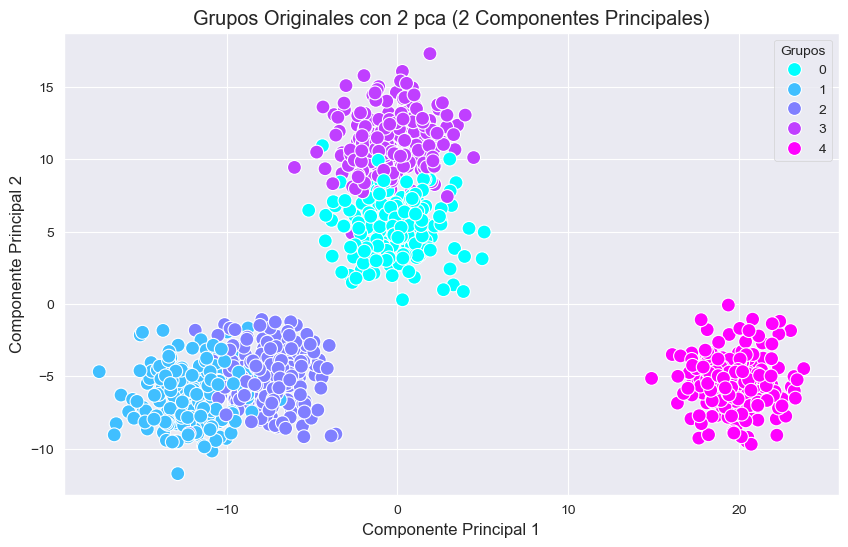

In [129]:
##Esto no sé si está bien quería probarlo 

# Gráfico de dispersión de los grupos originales
plt.figure(figsize=(10, 6))



sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue= y, palette='cool', s=100)
plt.title('Grupos Originales con 2 pca (2 Componentes Principales)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Grupos', loc='upper right')
plt.show()


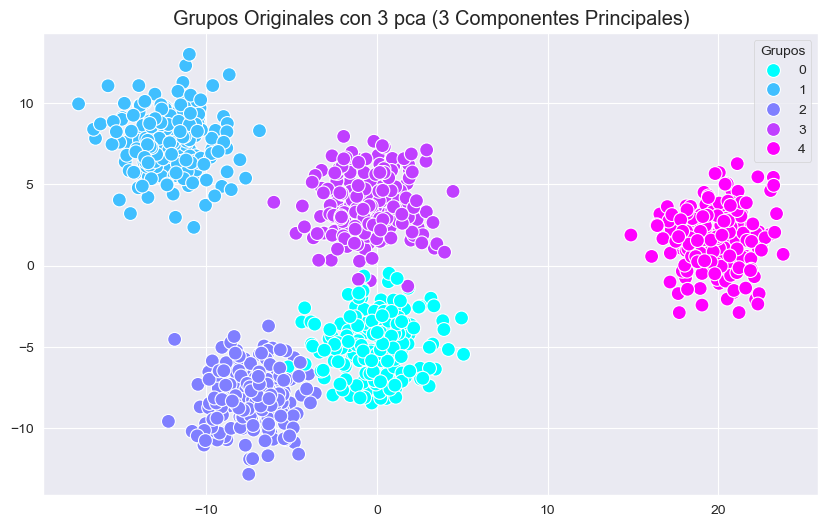

In [130]:
##Esto no sé si está bien quería probarlo 

# Gráfico de dispersión de los grupos originales
plt.figure(figsize=(10, 6))



sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 2], hue= y, palette='cool', s=100)
plt.title('Grupos Originales con 3 pca (3 Componentes Principales)')

plt.legend(title='Grupos', loc='upper right')
plt.show()